In [2]:
import numpy as np
import pandas as pd
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.ensemble as ensemble

from collections import Counter
from sklearn.svm import SVR, SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier

import warnings
%matplotlib inline
sns.set_style('darkgrid')
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('Admission_Predict_Ver1.1.csv')

In [4]:
df.head(25).T

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
Serial No.,1.00,2.00,3.00,4.00,5.00,6.00,7.00,8.00,9.0,10.00,...,16.00,17.00,18.00,19.00,20.00,21.00,22.0,23.00,24.00,25.00
GRE Score,337.00,324.00,316.00,322.00,314.00,330.00,321.00,308.00,302.0,323.00,...,314.00,317.00,319.00,318.00,303.00,312.00,325.0,328.00,334.00,336.00
TOEFL Score,118.00,107.00,104.00,110.00,103.00,115.00,109.00,101.00,102.0,108.00,...,105.00,107.00,106.00,110.00,102.00,107.00,114.0,116.00,119.00,119.00
University Rating,4.00,4.00,3.00,3.00,2.00,5.00,3.00,2.00,1.0,3.00,...,3.00,3.00,3.00,3.00,3.00,3.00,4.0,5.00,5.00,5.00
SOP,4.50,4.00,3.00,3.50,2.00,4.50,3.00,3.00,2.0,3.50,...,3.50,4.00,4.00,4.00,3.50,3.00,3.0,5.00,5.00,4.00
LOR,4.50,4.50,3.50,2.50,3.00,3.00,4.00,4.00,1.5,3.00,...,2.50,3.00,3.00,3.00,3.00,2.00,2.0,5.00,4.50,3.50
CGPA,9.65,8.87,8.00,8.67,8.21,9.34,8.20,7.90,8.0,8.60,...,8.30,8.70,8.00,8.80,8.50,7.90,8.4,9.50,9.70,9.80
Research,1.00,1.00,1.00,1.00,0.00,1.00,1.00,0.00,0.0,0.00,...,0.00,0.00,1.00,0.00,0.00,1.00,0.0,1.00,1.00,1.00
Chance of Admit,0.92,0.76,0.72,0.80,0.65,0.90,0.75,0.68,0.5,0.45,...,0.54,0.66,0.65,0.63,0.62,0.64,0.7,0.94,0.95,0.97


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Serial No.,500.0,250.50000,144.481833,1.00,125.7500,250.50,375.25,500.00
GRE Score,500.0,316.47200,11.295148,290.00,308.0000,317.00,325.00,340.00
TOEFL Score,500.0,107.19200,6.081868,92.00,103.0000,107.00,112.00,120.00
University Rating,500.0,3.11400,1.143512,1.00,2.0000,3.00,4.00,5.00
SOP,500.0,3.37400,0.991004,1.00,2.5000,3.50,4.00,5.00
LOR,500.0,3.48400,0.925450,1.00,3.0000,3.50,4.00,5.00
CGPA,500.0,8.57644,0.604813,6.80,8.1275,8.56,9.04,9.92
Research,500.0,0.56000,0.496884,0.00,0.0000,1.00,1.00,1.00
Chance of Admit,500.0,0.72174,0.141140,0.34,0.6300,0.72,0.82,0.97


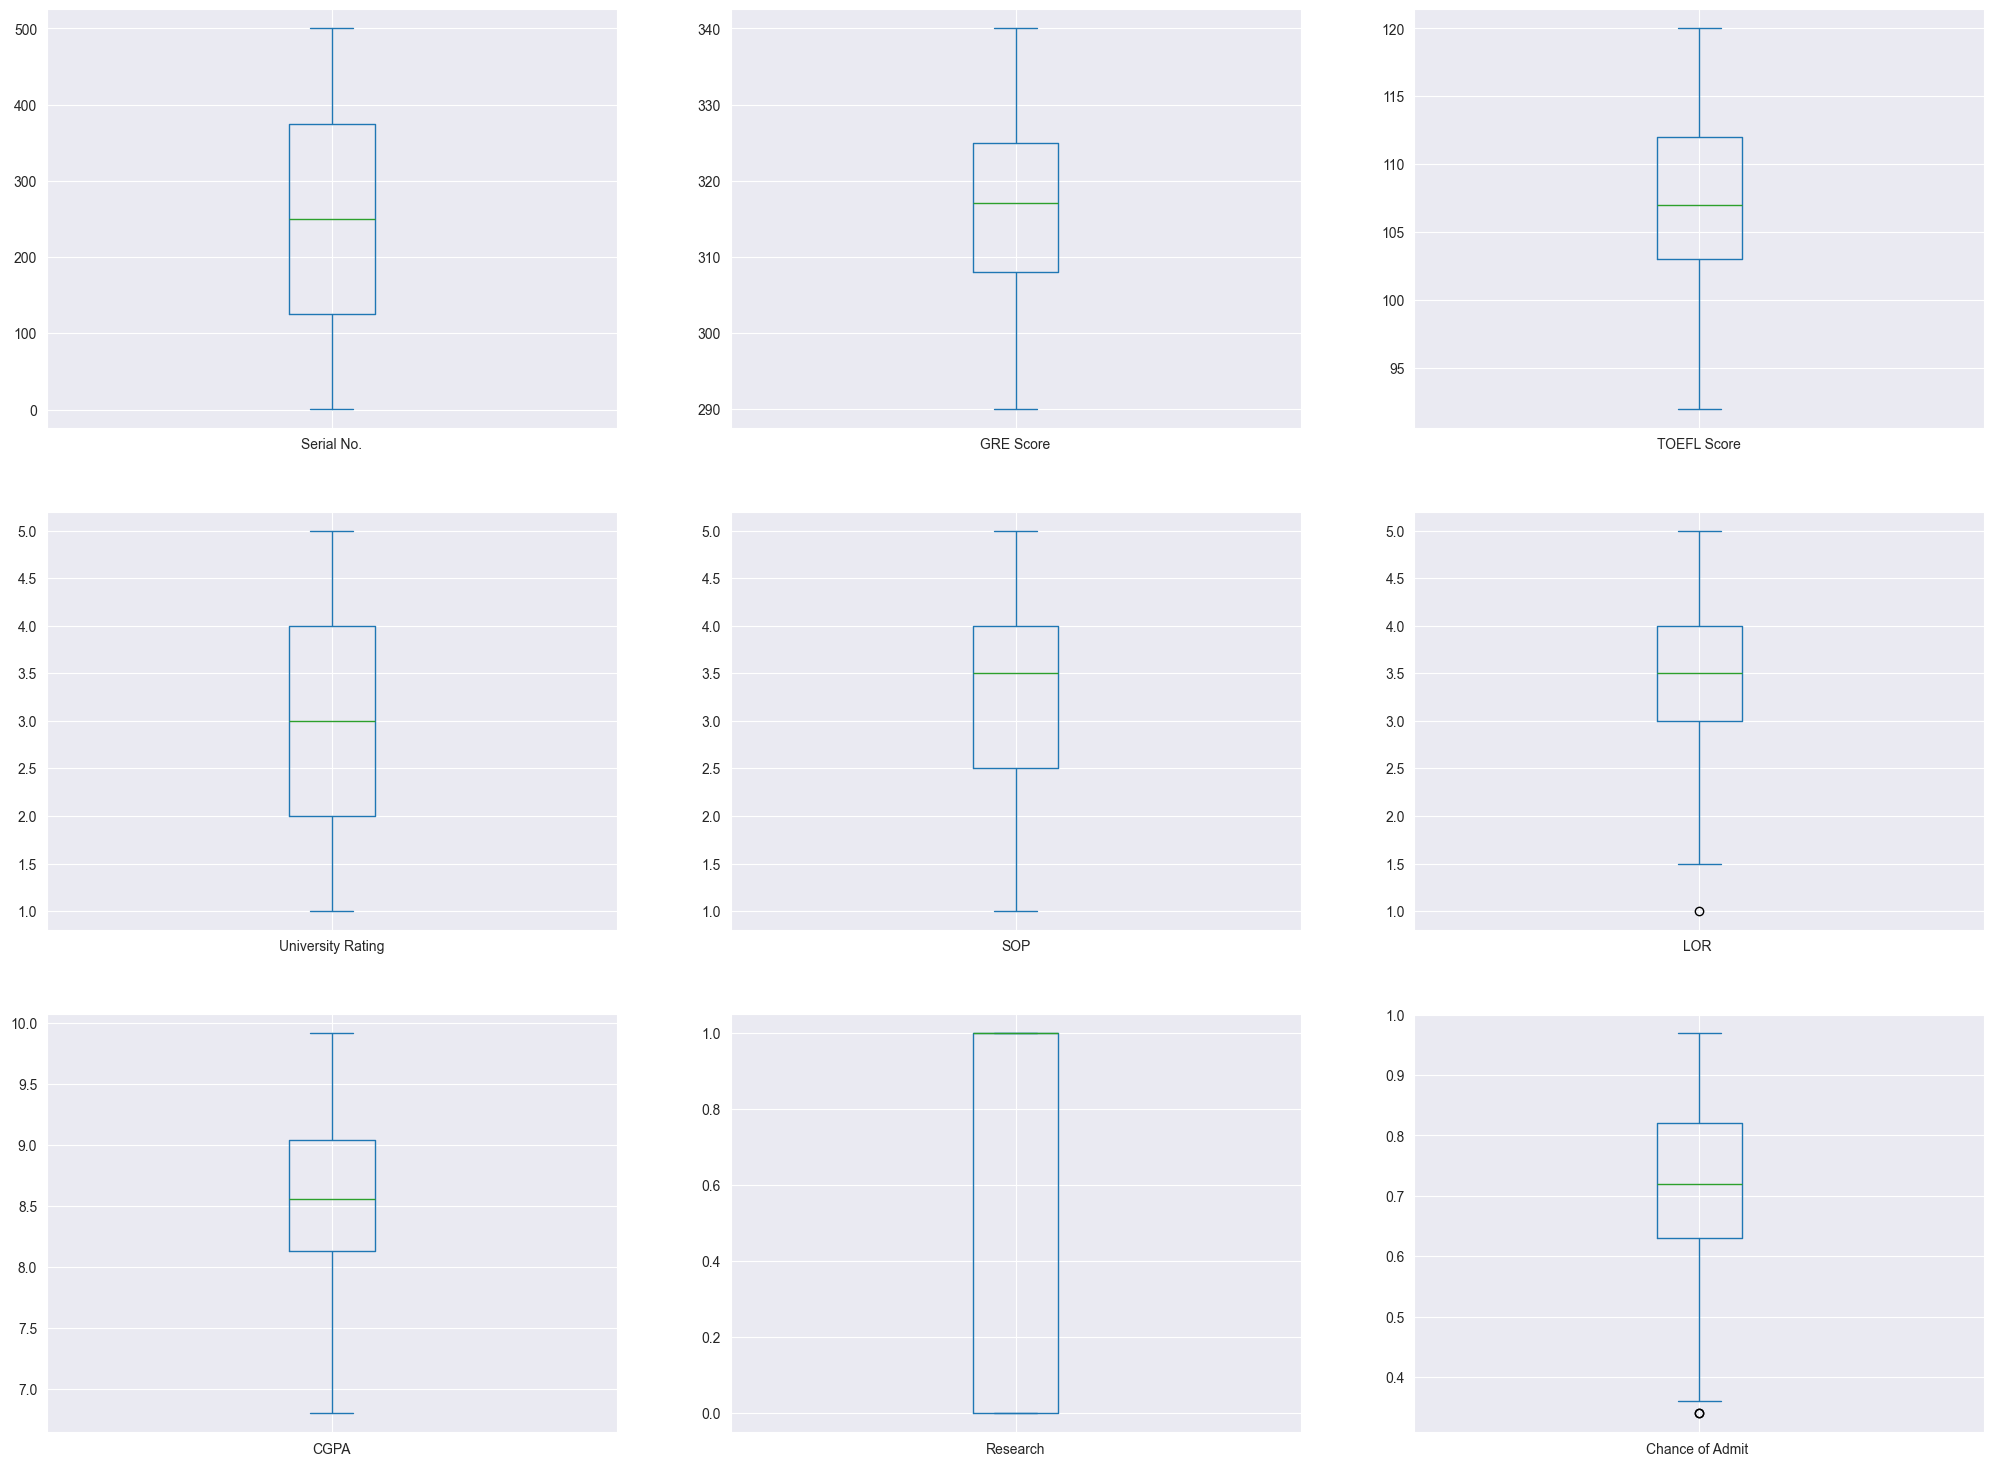

In [7]:
df.plot(kind='box',subplots=True,figsize=(25,25),layout=(4,3))
plt.show()

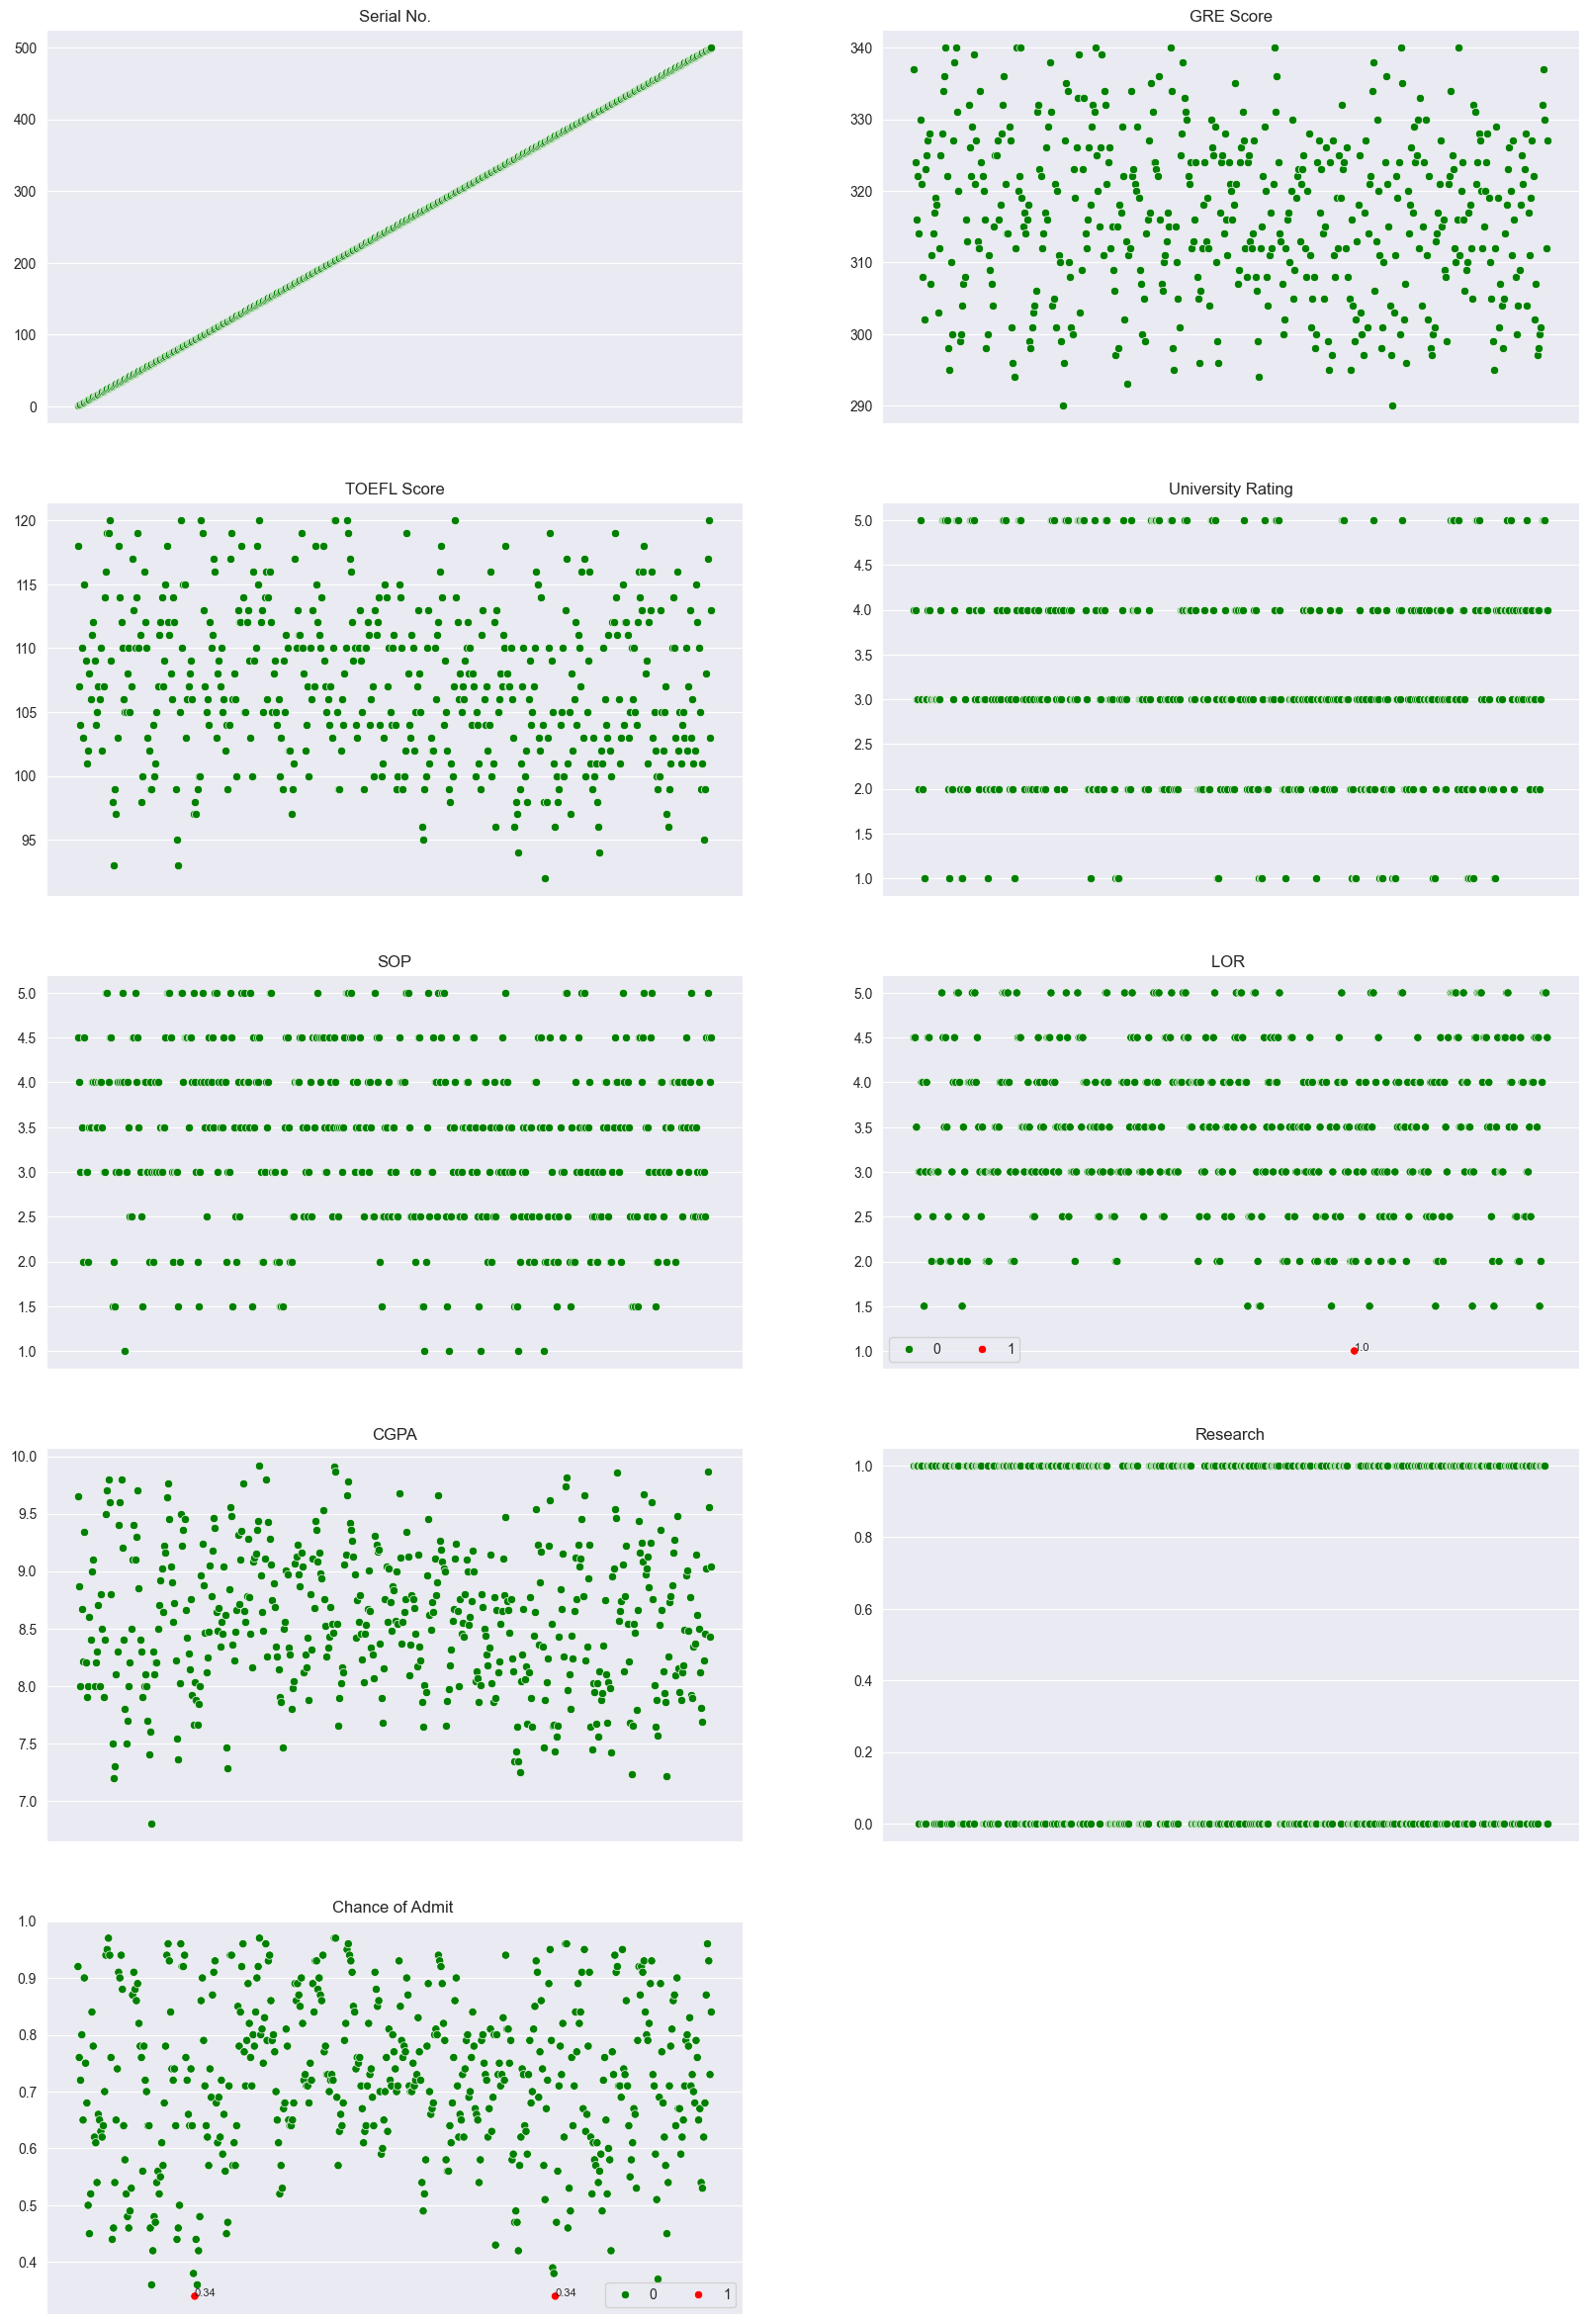

In [10]:
#FUNCTION TO IDENTIFY OUTLIERS USING IQR METHOD
def iqr_outlier(x,factor):
    q1 = x.quantile(0.25)
    q3 = x.quantile(0.75)
    iqr = q3 - q1
    min_ = q1 - factor * iqr
    max_ = q3 + factor * iqr
    result_ = pd.Series([0] * len(x))
    result_[((x < min_) | (x > max_))] = 1
    return result_


#SCATTER PLOTS HIGHLIGHTING OUTLIERS CALCULATED USING IQR METHOD
fig, ax = plt.subplots(5, 2, figsize=(20, 30))
row = col = 0
for n,i in enumerate(df.columns):
    if (n % 2 == 0) & (n > 0):
        row += 1
        col = 0
    outliers = iqr_outlier(df[i], 1.5)

    if sum(outliers) == 0:
        sns.scatterplot(x = np.arange(len(df[i])), y = df[i], ax = ax[row, col], legend=False, color = 'green')
    else:
        sns.scatterplot(x = np.arange(len(df[i])), y = df[i], ax = ax[row, col], hue = outliers, palette = ['green','red'])
    for x,y in zip(np.arange(len(df[i]))[outliers == 1], df[i][outliers == 1]):
        ax[row,col].text(x = x, y = y, s = y, fontsize = 8)
    ax[row,col].set_ylabel("")
    ax[row,col].set_title(i)
    ax[row,col].xaxis.set_visible(False)
    if sum(outliers) > 0:
        ax[row,col].legend(ncol=2)
    col += 1
ax[row,col].axis('off')
plt.show()

In [67]:
a = df["Chance of Admit "]
factor = 1.5

q1 = a.quantile(0.25)
q3 = a.quantile(0.75)
iqr = q3 - q1
lb = q1 - factor * iqr
ub = q3 + factor * iqr

outlier = a[((a < lb) | (a > ub))]
outlier

df_clean = a[((a > lb) & (a < ub))]
df_clean
# df_clean.plot(kind='box')

# clean = ~outlier['Chance of Admit']
# clean


0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance of Admit , Length: 498, dtype: float64